# Job Skills Analysis

In [ ]:
!python -m spacy download en_core_web_lg

In [ ]:
import pandas as pd
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import spacy
from spacy.matcher import PhraseMatcher
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the datasets
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,company,position,url,location,headquaters,employees,founded,industry,Job Description
0,1,Visual BI Solutions Inc,Graduate Intern (Summer 2017) - SAP BI / Big D...,https://www.glassdoor.com/partner/jobListing.h...,"Plano, TX","Plano, TX",51 to 200 employees,2010,Information Technology,"Location: Plano, TX or Oklahoma City, OK Dura..."
1,2,Jobvertise,Digital Marketing Manager,https://www.glassdoor.com/partner/jobListing.h...,"Dallas, TX","Berlin, Germany",1 to 50 employees,2011,Unknown,The Digital Marketing Manager is the front li...
2,3,Santander Consumer USA,"Manager, Pricing Management Information Systems",https://www.glassdoor.com/partner/jobListing.h...,"Dallas, TX","Dallas, TX",5001 to 10000 employees,1995,Finance,Summary of Responsibilities:The Manager Prici...
3,4,Federal Reserve Bank of Dallas,Treasury Services Analyst Internship,https://www.glassdoor.com/partner/jobListing.h...,"Dallas, TX","Dallas, TX",1001 to 5000 employees,1914,Finance,ORGANIZATIONAL SUMMARY: As part of the nati...
4,5,Aviall,"Intern, Sales Analyst",https://www.glassdoor.com/partner/jobListing.h...,"Dallas, TX","Dallas, TX",1001 to 5000 employees,Boeing,Subsidiary or Business Segment,Aviall is the world's largest provider of n...


In [ ]:
# General information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       157 non-null    int64 
 1   company          157 non-null    object
 2   position         157 non-null    object
 3   url              157 non-null    object
 4   location         157 non-null    object
 5   headquaters      157 non-null    object
 6   employees        154 non-null    object
 7   founded          154 non-null    object
 8   industry         154 non-null    object
 9   Job Description  157 non-null    object
dtypes: int64(1), object(9)
memory usage: 12.4+ KB


## Data Preprocessing for the 'Job Description' Column

In [8]:
# Tokenize job description
job_description_tokens = df["Job Description"].apply(word_tokenize)

# Remove stopwords, special characters and convert text to lowercase
cleaned_job_description_tokens = job_description_tokens.apply(
    lambda x: [token.lower() for token in x if token not in stopwords.words('english') and token.isalnum()])

cleaned_job_description_tokens.head()


,Job Description
0,"[location, plano, tx, oklahoma, city, ok, dura..."
1,"[the, digital, marketing, manager, front, line..."
2,"[summary, responsibilities, the, manager, pric..."
3,"[organizational, summary, as, part, nation, ce..."
4,"[aviall, world, largest, provider, new, aviati..."


In [ ]:
# Add the cleaned job description tokens to the dataframe
df["cleaned_job_description_tokens"] = cleaned_job_description_tokens

## Automated Skill Extraction Using a Predefined Skill List

In [ ]:
# Predefined list of technical skills
technical_skills = [
    # Programming Languages
    "Python", "Java", "JavaScript", "C++", "C#", "Ruby", "Go", "Swift", "Kotlin", "TypeScript",
    "R", "PHP", "SQL", "Bash/Shell Scripting", "Perl", "Scala", "Rust", "Dart", "MATLAB",
    "Julia", "Haskell", "Elixir", "Erlang", "Lua", "Groovy",

    # Web Development
    "HTML", "CSS", "JavaScript (ES6+)", "React.js", "Angular", "Vue.js", "Node.js", "Django",
    "Flask", "Ruby on Rails", "Spring Boot", "ASP.NET", "Laravel", "Express.js", "NestJS",
    "GraphQL", "RESTful APIs", "WebSockets", "WebAssembly", "Webpack", "Babel", "SASS", "LESS",

    # Data Science & Machine Learning
    "NumPy", "Pandas", "Scikit-learn", "TensorFlow", "PyTorch", "Keras", "XGBoost", "LightGBM",
    "Apache Spark", "Hadoop", "Tableau", "Power BI", "Matplotlib", "Seaborn", "Plotly",
    "Jupyter Notebooks", "Google Colab", "Data Wrangling", "Data Visualization",
    "Natural Language Processing (NLP)", "Computer Vision", "Reinforcement Learning",
    "OpenCV", "NLTK", "spaCy", "Gensim", "H2O.ai", "MLflow", "Databricks",

    # Cloud Computing & DevOps
    "Amazon Web Services (AWS)", "Microsoft Azure", "Google Cloud Platform (GCP)", "Docker",
    "Kubernetes", "Terraform", "Ansible", "Jenkins", "GitLab CI/CD", "GitHub Actions",
    "Prometheus", "Grafana", "ELK Stack (Elasticsearch, Logstash, Kibana)", "CloudFormation",
    "Serverless Computing", "Microservices Architecture", "OpenStack", "Vagrant", "Puppet",
    "Chef", "Istio", "Helm", "Consul",

    # Databases
    "MySQL", "PostgreSQL", "MongoDB", "Redis", "Cassandra", "SQLite", "Oracle",
    "Microsoft SQL Server", "Firebase", "DynamoDB", "Neo4j", "Elasticsearch", "Couchbase",
    "MariaDB", "Snowflake", "BigQuery", "HBase", "CockroachDB", "InfluxDB",

    # Software Development Tools
    "Git", "GitHub", "GitLab", "Bitbucket", "Jira", "Trello", "Confluence", "Visual Studio Code",
    "IntelliJ IDEA", "PyCharm", "Eclipse", "Sublime Text", "Atom", "Postman", "Swagger",
    "Insomnia", "Fiddler", "SoapUI", "DBeaver", "DataGrip", "RStudio", "JupyterLab",

    # Mobile Development
    "Android Development (Java/Kotlin)", "iOS Development (Swift/Objective-C)", "React Native",
    "Flutter", "Xamarin", "Ionic", "PhoneGap", "Cordova", "SwiftUI", "Jetpack Compose",

    # Cybersecurity
    "Penetration Testing", "Ethical Hacking", "Network Security", "Cryptography",
    "Firewall Configuration", "Intrusion Detection Systems (IDS)", "Intrusion Prevention Systems (IPS)",
    "Security Information and Event Management (SIEM)", "OWASP Top 10", "Burp Suite", "Nmap",
    "Metasploit", "Wireshark", "Kali Linux", "Snort", "Splunk", "Nessus", "OpenVAS",

    # Networking
    "TCP/IP", "DNS", "HTTP/HTTPS", "VPN", "Load Balancing", "SDN (Software-Defined Networking)",
    "Cisco IOS", "Wireshark", "MPLS (Multiprotocol Label Switching)", "BGP", "OSPF", "VLAN",
    "Firewall Management", "Network Monitoring", "Packet Analysis",

    # Operating Systems
    "Linux (Ubuntu, CentOS, Red Hat)", "Windows Server", "macOS", "Unix", "Kali Linux",
    "Debian", "Fedora", "Arch Linux", "FreeBSD", "OpenBSD",

    # Other Tools & Technologies
    "Apache Kafka", "RabbitMQ", "Apache Hadoop", "Apache Flink", "Apache Storm", "Apache Airflow",
    "Apache NiFi", "Splunk", "Datadog", "New Relic", "Selenium", "Puppeteer", "Cypress",
    "JMeter", "Gatling", "Locust", "BlazeMeter", "PostgreSQL", "MongoDB", "Redis", "Cassandra",
    "SQLite", "Oracle", "Microsoft SQL Server", "Firebase", "DynamoDB", "Neo4j", "Elasticsearch",

    # Soft Skills & Expertise
    "Agile Methodology", "Scrum", "Kanban", "Project Management", "Team Collaboration",
    "Problem Solving", "Debugging", "Code Review", "Technical Writing", "Mentoring",
    "Continuous Integration/Continuous Deployment (CI/CD)", "Test-Driven Development (TDD)",
    "Behavior-Driven Development (BDD)", "Pair Programming", "Code Refactoring",
    "Software Architecture", "System Design", "DevOps Culture", "Site Reliability Engineering (SRE)",

    # Domain-Specific Expertise
    "Blockchain Development", "Smart Contracts (Solidity)", "Cryptocurrency", "IoT (Internet of Things)",
    "AR/VR (Augmented Reality/Virtual Reality)", "Game Development (Unity, Unreal Engine)",
    "Quantum Computing", "Robotics", "Embedded Systems", "FPGA Programming", "Digital Signal Processing",
    "Computer Graphics", "Bioinformatics", "Geographic Information Systems (GIS)", "FinTech",
    "HealthTech", "EdTech", "Autonomous Systems", "Cybersecurity", "Data Engineering",
    "Cloud Native Development", "Serverless Architecture", "Edge Computing"
]

# Conver skill to lowercase
technical_skills = [skill.lower() for skill in technical_skills]

# Remove duplicates
technical_skills = list(set(technical_skills))

In [ ]:
# Load the spaCy model
nlp = spacy.load("en_core_web_lg")

# Create PhraseMatcher
matcher = PhraseMatcher(nlp.vocab, attr="LOWER")

# Add phrases to the matcher
patterns = [nlp(skill) for skill in technical_skills]
matcher.add("TECH_SKILLS", None, *patterns)


def extract_skills(tokens):
  """
  Extract skills from a list of tokens.
  Returns a list of skills extracted from the tokens.
  """
  text = " ".join(tokens)
  doc = nlp(text)
  matches = matcher(doc)
  return [doc[start:end] for match_id, start, end in matches]

In [ ]:
# Extract skills from the cleaned job description tokens
skills = cleaned_job_description_tokens.apply(extract_skills)
skills.head()

,Job Description
0,"[(oracle), (sql), (data, visualization)]"
1,[]
2,"[(data, visualization), (data, visualization),..."
3,"[(problem, solving), (project, management)]"
4,"[(problem, solving)]"


## Top In-Demand Skills

In [ ]:
# Count the frequency of each skill
word_freq = {}
for skill in skills:
  for s in skill:
    if s.text in word_freq:
      word_freq[s.text] += 1
    else:
      word_freq[s.text] = 1

word_freq = sorted(word_freq.items(), key= lambda item: item[1], reverse=True)
word_freq[:10]

[('sql', 51),
 ('problem solving', 44),
 ('project management', 40),
 ('tableau', 15),
 ('java', 15),
 ('data visualization', 13),
 ('mentoring', 13),
 ('r', 11),
 ('html', 9),
 ('oracle', 8)]

<ipython-input-27-a3da6c02d3f1>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




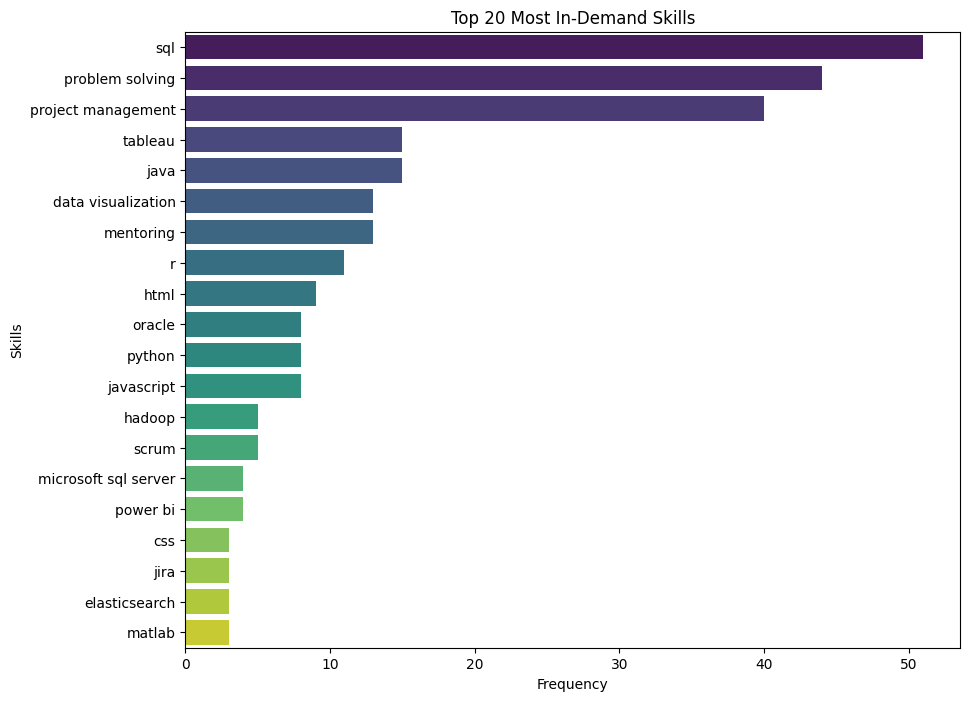

In [ ]:
# Select top 20 skills
top_n = 20
top_skills = [skill for skill, _ in word_freq[:top_n]]
top_frequencies = [freq for _, freq in word_freq[:top_n]]

# Plot the top 20 most in-demand skills
plt.figure(figsize=(10, 8))
sns.barplot(x=top_frequencies, y=top_skills, palette="viridis")
plt.xlabel('Frequency')
plt.ylabel('Skills')
plt.title(f'Top {top_n} Most In-Demand Skills')

plt.savefig('most_in_demand_skills.png', bbox_inches='tight', dpi=300)

plt.show()

## Industry-Specific Skills

In [ ]:
# Group the cleaned job description tokens by industry
descriptions_industry = df.groupby('industry')['cleaned_job_description_tokens'].apply(lambda x: [token for tokens in x for token in tokens])
descriptions_industry_df = descriptions_industry.reset_index()
descriptions_industry_df.head()

,industry,cleaned_job_description_tokens
0,$500 million to $1 billion (USD) per year,"[apply, overview, summary, responsibilities, t..."
1,Accounting & Legal,"[passionate, change, real, world, application,..."
2,Aerospace & Defense,"[university, programs, engineering, intern, ra..."
3,"Arts, Entertainment & Recreation","[general, description, financial, planning, an..."
4,Business Services,"[job, descriptions, downtown, agency, looking,..."


In [ ]:
# Extract skills from the cleaned job description tokens for each industry
skills_industry = descriptions_industry_df['cleaned_job_description_tokens'].apply(extract_skills)
descriptions_industry_df['skills'] = skills_industry
descriptions_industry_df.head()

,industry,cleaned_job_description_tokens,skills
0,$500 million to $1 billion (USD) per year,"[apply, overview, summary, responsibilities, t...","[(data, visualization), (data, visualization),..."
1,Accounting & Legal,"[passionate, change, real, world, application,...","[(data, visualization), (problem, solving), (s..."
2,Aerospace & Defense,"[university, programs, engineering, intern, ra...","[(autonomous, systems), (sql), (python), (r), ..."
3,"Arts, Entertainment & Recreation","[general, description, financial, planning, an...","[(mentoring), (mentoring)]"
4,Business Services,"[job, descriptions, downtown, agency, looking,...","[(problem, solving), (html), (css), (java), (p..."


In [ ]:
# Count the frequency of each skill for each industry
descriptions_industry_df['skill_counts'] = descriptions_industry_df['skills'].apply(
    lambda skills: pd.Series([str(skill).strip().lower() for skill in skills]).value_counts().to_dict()
)

In [63]:
descriptions_industry_df.head()

,industry,cleaned_job_description_tokens,skills,skill_counts
0,$500 million to $1 billion (USD) per year,"[apply, overview, summary, responsibilities, t...","[(data, visualization), (data, visualization),...","{'data visualization': 6, 'sql': 2, 'tableau':..."
1,Accounting & Legal,"[passionate, change, real, world, application,...","[(data, visualization), (problem, solving), (s...","{'project management': 4, 'sql': 2, 'go': 2, '..."
2,Aerospace & Defense,"[university, programs, engineering, intern, ra...","[(autonomous, systems), (sql), (python), (r), ...","{'sql': 4, 'python': 3, 'r': 3, 'matlab': 2, '..."
3,"Arts, Entertainment & Recreation","[general, description, financial, planning, an...","[(mentoring), (mentoring)]",{'mentoring': 2}
4,Business Services,"[job, descriptions, downtown, agency, looking,...","[(problem, solving), (html), (css), (java), (p...","{'project management': 7, 'problem solving': 6..."


In [ ]:
# Explode the skill counts into separate rows
exploded_data = []
for index, row in descriptions_industry_df.iterrows():
    industry = row['industry']
    skill_counts = row['skill_counts']
    for skill, count in skill_counts.items():
        exploded_data.append({'industry': industry, 'skill': skill, 'count': count})

# Convert the exploded data into a DataFrame
exploded_df = pd.DataFrame(exploded_data)

# Display the result
exploded_df.head()

                                    industry               skill  count
0  $500 million to $1 billion (USD) per year  data visualization      6
1  $500 million to $1 billion (USD) per year                 sql      2
2  $500 million to $1 billion (USD) per year             tableau      2
3  $500 million to $1 billion (USD) per year     problem solving      2
4                         Accounting & Legal  project management      4


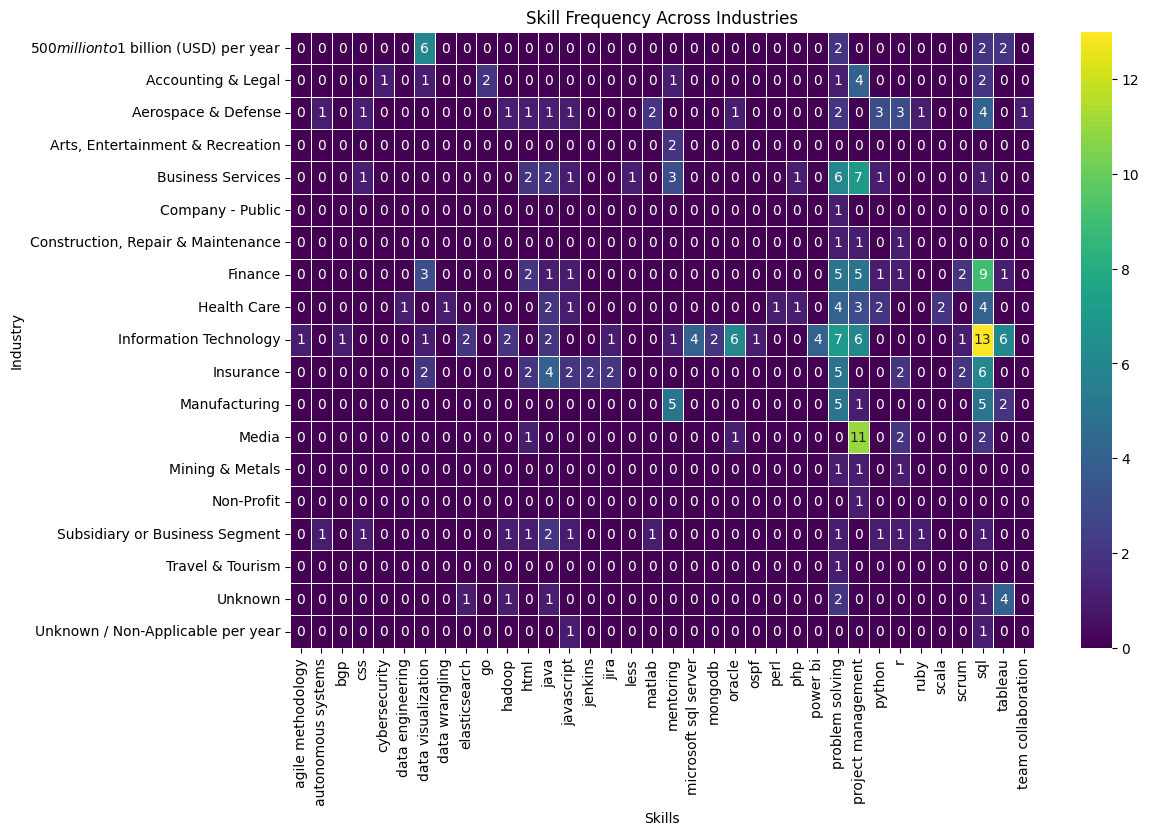

In [ ]:
# Pivot the data for the heatmap
heatmap_data = exploded_df.pivot_table(index='industry', columns='skill', values='count', aggfunc='sum', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='g', linewidths=0.5)
plt.title('Skill Frequency Across Industries')
plt.xlabel('Skills')
plt.ylabel('Industry')
plt.show()

In [ ]:
# Get the top 3 skills for each industry
top_n = 3
top_skills_by_industry = exploded_df.groupby('industry').apply(lambda x: x.nlargest(top_n, 'count')).reset_index(drop=True)

# Display the result
top_skills_by_industry.head()

                                    industry               skill  count
0  $500 million to $1 billion (USD) per year  data visualization      6
1  $500 million to $1 billion (USD) per year                 sql      2
2  $500 million to $1 billion (USD) per year             tableau      2
3                         Accounting & Legal  project management      4
4                         Accounting & Legal                 sql      2


<ipython-input-80-377fc97d2a51>:3: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



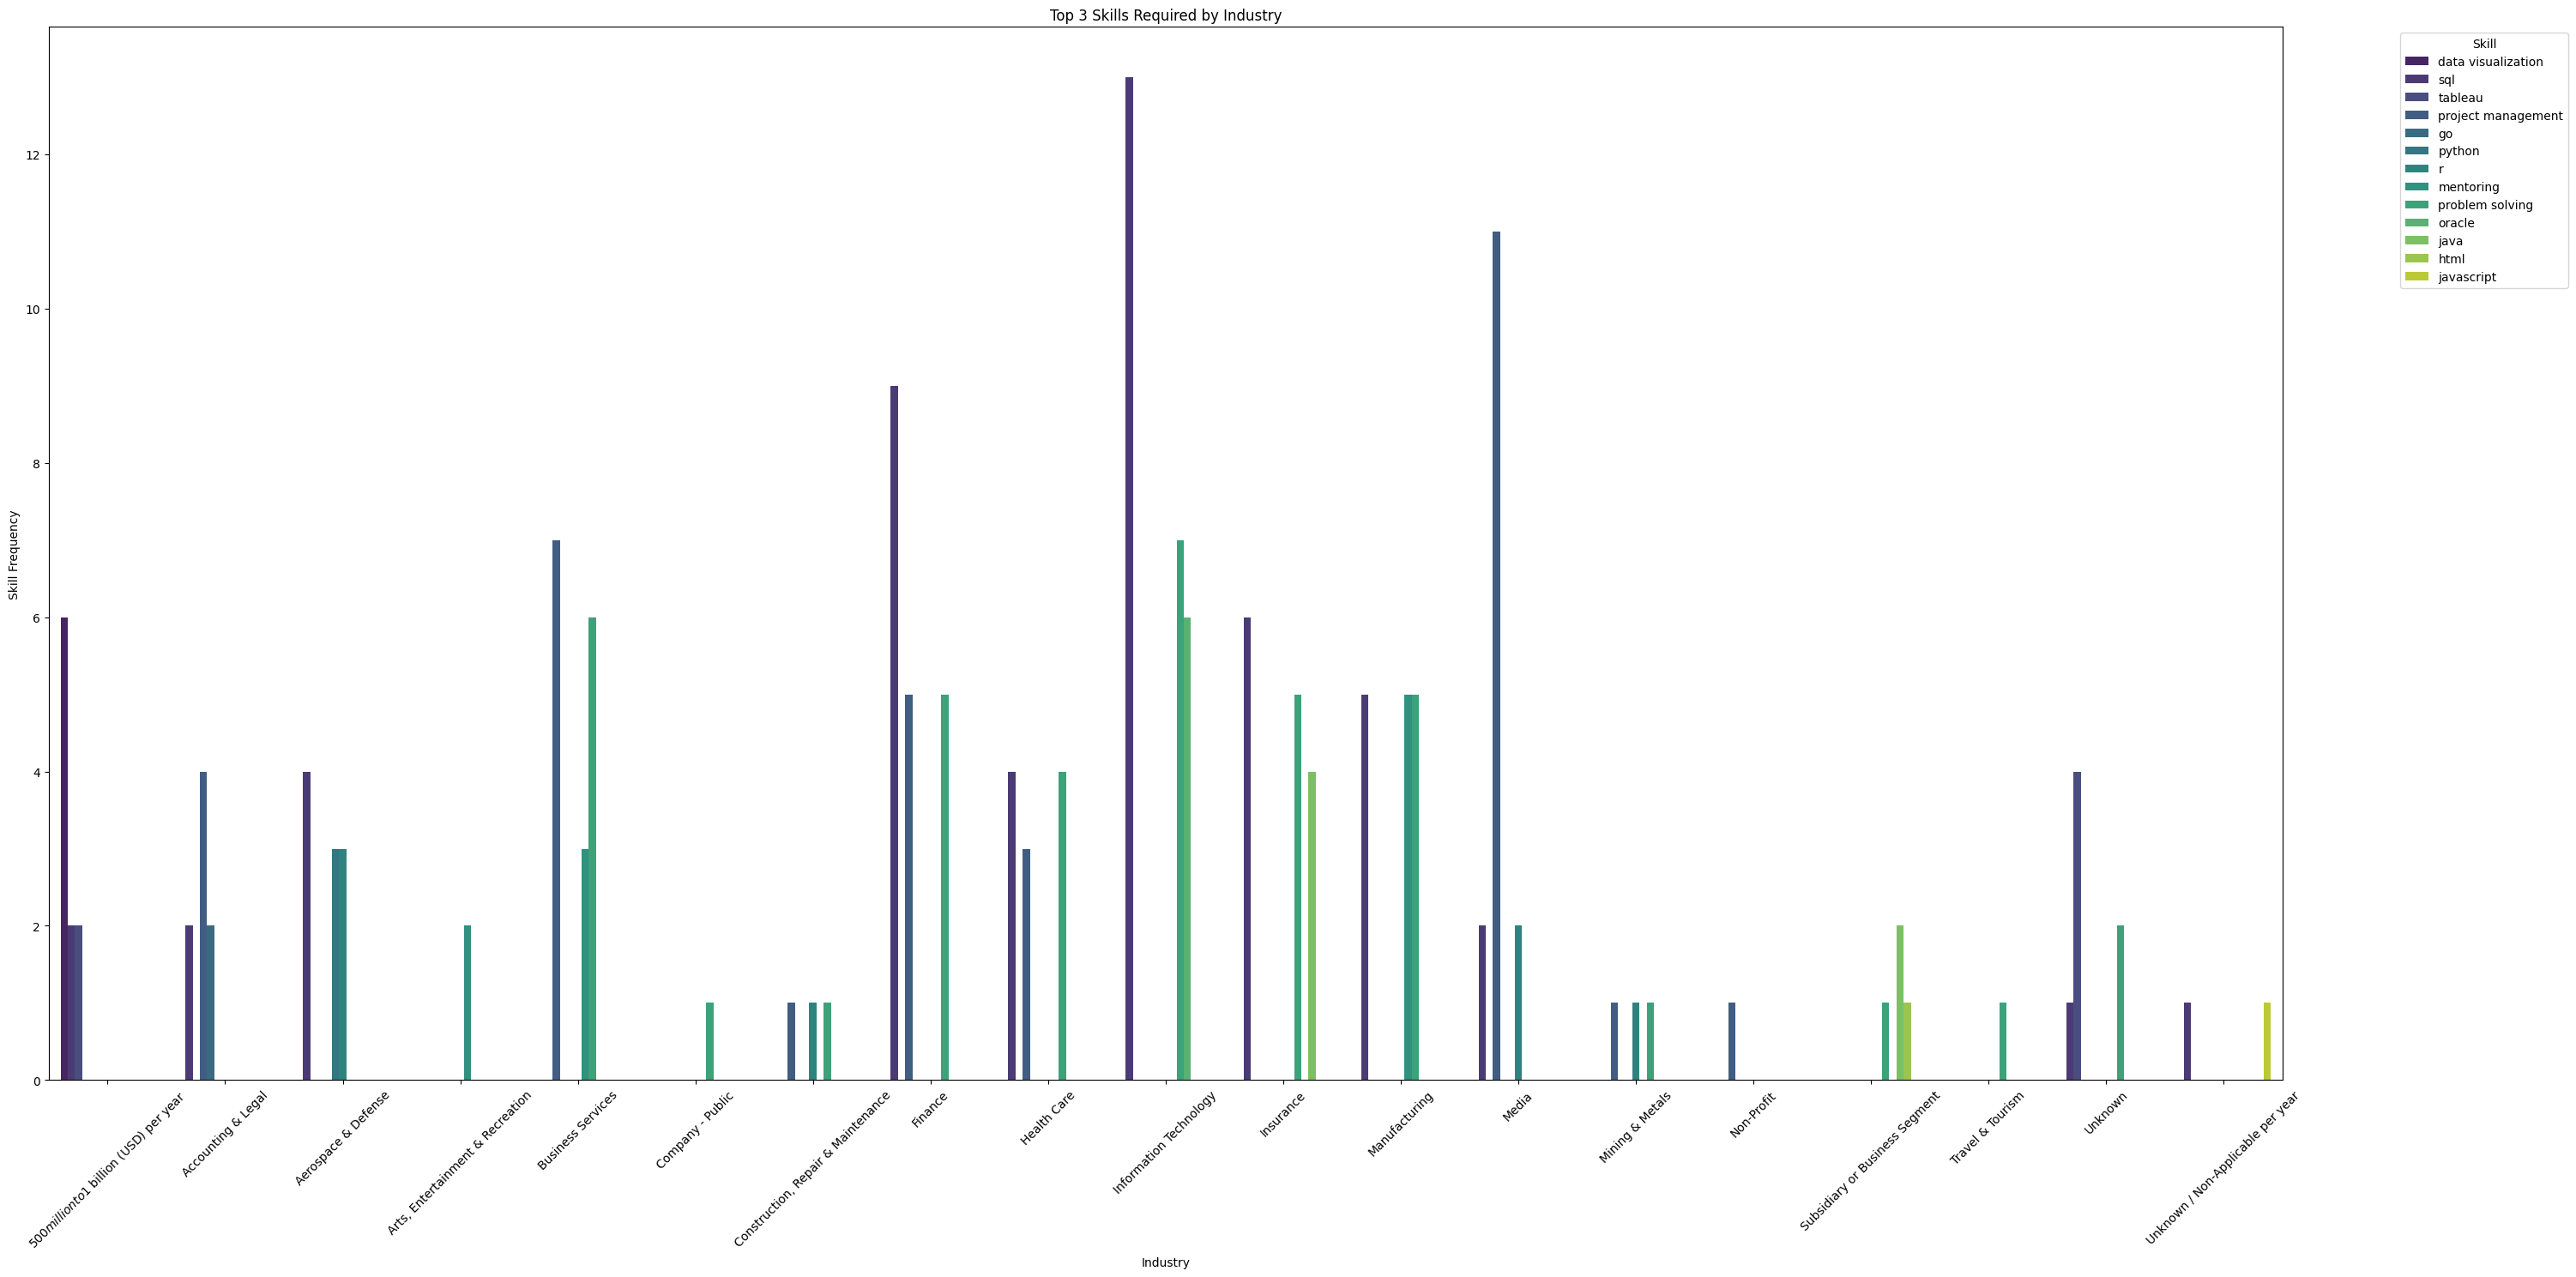

In [ ]:
# Plot the grouped bar plot
plt.figure(figsize=(30, 15))
sns.barplot(data=top_skills_by_industry, x='industry', y='count', hue='skill', palette='viridis')
plt.title(f'Top {top_n} Skills Required by Industry')
plt.xlabel('Industry')
plt.ylabel('Skill Frequency')
plt.legend(title='Skill', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

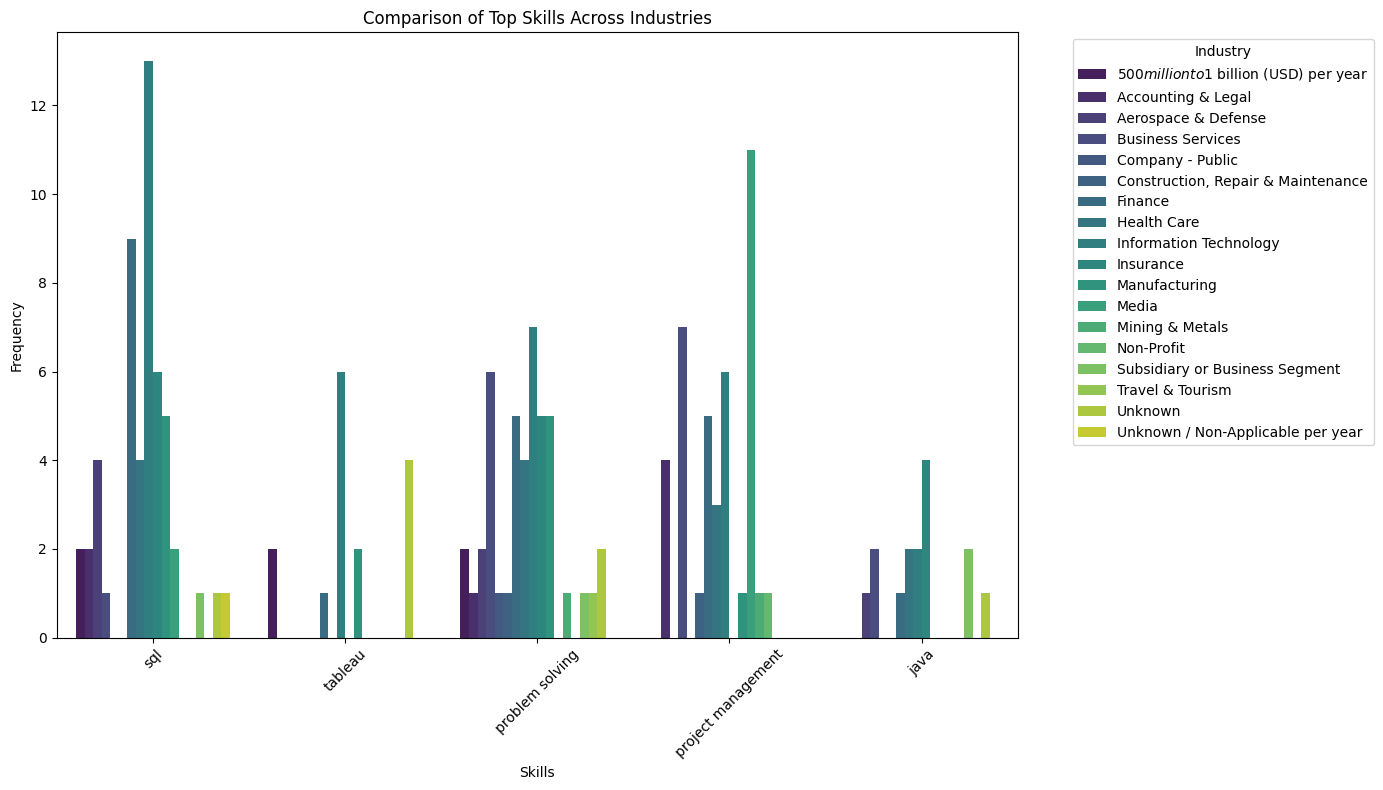

In [ ]:
# Filter the data for specific skills (top 5 skills)
top_skills = exploded_df.groupby('skill')['count'].sum().nlargest(5).index
filtered_data = exploded_df[exploded_df['skill'].isin(top_skills)]

# Plot the grouped bar plot
plt.figure(figsize=(14, 8))
sns.barplot(data=filtered_data, x='skill', y='count', hue='industry', palette='viridis')
plt.title('Comparison of Top Skills Across Industries')
plt.xlabel('Skills')
plt.ylabel('Frequency')
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('Comparison_of_Top_Skills_Across_Industries.png', bbox_inches='tight', dpi=300)

plt.show()